<a href="https://colab.research.google.com/github/gabrieldepaiva/ProjetosParalelos/blob/main/WebScraping_Varia%C3%A7%C3%A3o_de_Ativos_em_Rela%C3%A7%C3%A3o_ao_Ibovespa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importação das Bibliotecas Necessárias

In [1]:
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

## Escolha dos Ativos

In [2]:
carteira = ['SUZB3.SA','KLBN3.SA','^BVSP'] #'MSPA3.SA' 'RANI3.SA'

## Importação dos Dados

In [3]:
BaseDados = pd.DataFrame()

for acao in carteira:
  BaseDados[acao] = wb.DataReader(acao, data_source = 'yahoo', start = '2020-1-1')['Adj Close']

BaseDados.head()

,SUZB3.SA,KLBN3.SA,^BVSP
Date,,,
2020-01-02,40.790001,4.335335,118573.0
2020-01-03,40.650002,4.345325,117707.0
2020-01-06,40.580002,4.345325,116878.0
2020-01-07,41.099998,4.345325,116662.0
2020-01-08,43.150002,4.275400,116247.0


## Normalização dos Dados

In [12]:
retorno_carteira = ((BaseDados/BaseDados.iloc[0])-1)*100
retorno_carteira.columns = ['Suzano','Klabin','Ibovespa']
retorno_carteira.head()

,Suzano,Klabin,Ibovespa
Date,,,
2020-01-02,0.000000,0.000000,0.000000
2020-01-03,-0.343220,0.230415,-0.730352
2020-01-06,-0.514830,0.230415,-1.429499
2020-01-07,0.759984,0.230415,-1.611665
2020-01-08,5.785733,-1.382490,-1.961661


## Elaboração do Gráfico

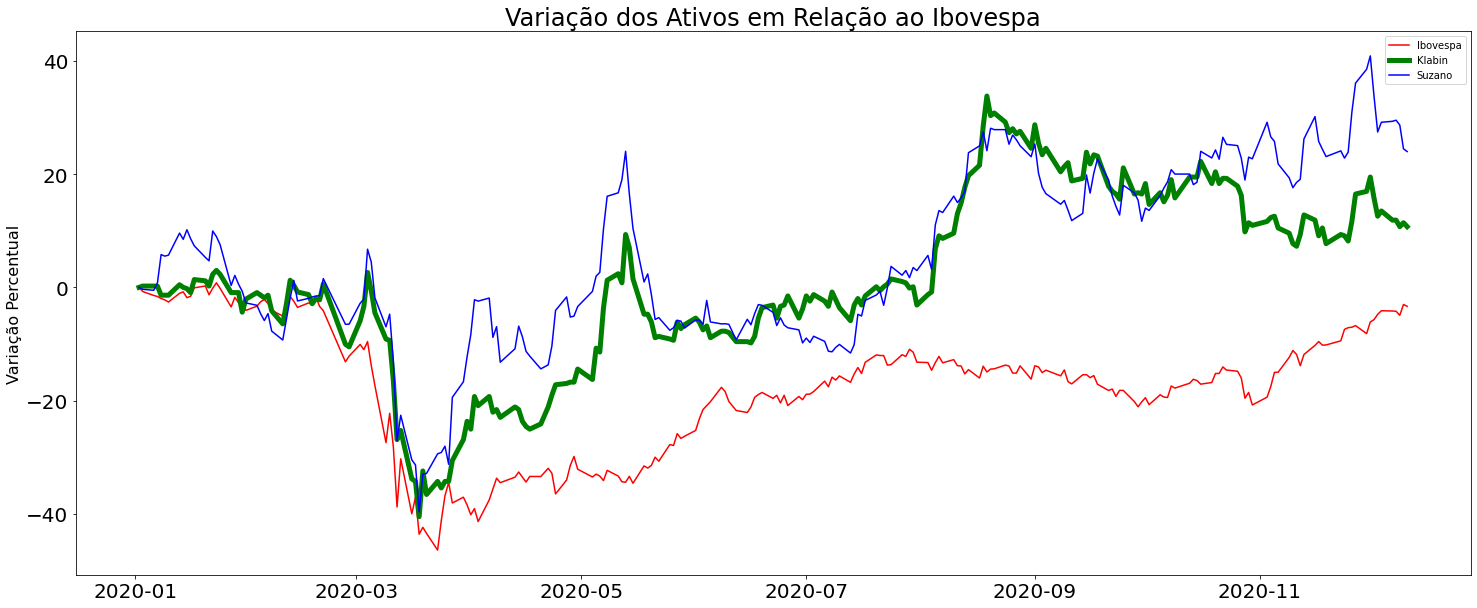

In [40]:
plt.figure(figsize=(25,10))
plt.plot(retorno_carteira.Ibovespa,Color="Red")
plt.plot(retorno_carteira.Klabin,LineWidth=5, Color="Green")
plt.plot(retorno_carteira.Suzano, Color="Blue")
plt.title ('Variação dos Ativos em Relação ao Ibovespa',fontsize=24)
plt.xlabel('')
plt.ylabel('Variação Percentual',fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(['Ibovespa','Klabin','Suzano'])